In [1]:
!pip install -q huggingface_hub pandas scikit-learn h5py matplotlib

import os, glob, h5py, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from huggingface_hub import snapshot_download
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
DATA_DIR   = "./cropnet_data"
STATE_ABBR = "CA"            # Sentinel path
STATE_NAME = "CALIFORNIA"    # USDA tables
YEARS      = [2019, 2020, 2021, 2022]

os.makedirs("outputs", exist_ok=True)


In [3]:
allow = ["USDA Crop Dataset/**","metadata/**"] \
      + [f"Sentinel-2 Imagery/data/AG/{y}/{STATE_ABBR}/**" for y in YEARS]

snapshot_download(
    repo_id="CropNet/CropNet",
    repo_type="dataset",
    local_dir=DATA_DIR,
    local_dir_use_symlinks=False,
    allow_patterns=allow
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:982: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 44 files:   0%|          | 0/44 [00:00<?, ?it/s]

Sentinel-2 Imagery/data/AG/2019/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2020/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2020/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2020/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2019/CA/Agric(…):   0%|          | 0.00/1.80G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2019/CA/Agric(…):   0%|          | 0.00/1.77G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2019/CA/Agric(…):   0%|          | 0.00/1.80G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2020/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2021/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2021/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2021/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2021/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2022/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2022/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2022/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Sentinel-2 Imagery/data/AG/2022/CA/Agric(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

USDA_Corn_County_2016.csv: 0.00B [00:00, ?B/s]

USDA_Corn_County_2017.csv: 0.00B [00:00, ?B/s]

USDA_Corn_County_2018.csv: 0.00B [00:00, ?B/s]

USDA_Corn_County_2019.csv: 0.00B [00:00, ?B/s]

USDA_Corn_County_2020.csv: 0.00B [00:00, ?B/s]

USDA_Corn_County_2021.csv: 0.00B [00:00, ?B/s]

USDA_Corn_County_2022.csv: 0.00B [00:00, ?B/s]

USDA_Cotton_County_2016.csv: 0.00B [00:00, ?B/s]

USDA_Cotton_County_2017.csv: 0.00B [00:00, ?B/s]

USDA_Cotton_County_2018.csv: 0.00B [00:00, ?B/s]

USDA_Cotton_County_2019.csv: 0.00B [00:00, ?B/s]

USDA_Cotton_County_2020.csv: 0.00B [00:00, ?B/s]

USDA_Cotton_County_2021.csv: 0.00B [00:00, ?B/s]

USDA_Cotton_County_2022.csv: 0.00B [00:00, ?B/s]

USDA_Soybean_County_2016.csv: 0.00B [00:00, ?B/s]

USDA_Soybean_County_2017.csv: 0.00B [00:00, ?B/s]

USDA_Soybean_County_2018.csv: 0.00B [00:00, ?B/s]

USDA_Soybean_County_2019.csv: 0.00B [00:00, ?B/s]

USDA_Soybean_County_2020.csv: 0.00B [00:00, ?B/s]

USDA_Soybean_County_2021.csv: 0.00B [00:00, ?B/s]

USDA_Soybean_County_2022.csv: 0.00B [00:00, ?B/s]

USDA_WinterWheat_County_2016.csv: 0.00B [00:00, ?B/s]

USDA_WinterWheat_County_2017.csv: 0.00B [00:00, ?B/s]

USDA_WinterWheat_County_2018.csv: 0.00B [00:00, ?B/s]

USDA_WinterWheat_County_2019.csv: 0.00B [00:00, ?B/s]

USDA_WinterWheat_County_2020.csv: 0.00B [00:00, ?B/s]

USDA_WinterWheat_County_2021.csv: 0.00B [00:00, ?B/s]

USDA_WinterWheat_County_2022.csv: 0.00B [00:00, ?B/s]

'/content/cropnet_data'

In [4]:
def _to_num(s: pd.Series) -> pd.Series:
    return pd.to_numeric(
        s.astype(str).str.replace(",", "", regex=False).str.extract(r"([-+]?\d*\.?\d+)")[0],
        errors="coerce"
    )

def load_usda_yield(base_dir: str, state_name: str, years: list[int]) -> pd.DataFrame:
    usda_root = os.path.join(base_dir, "USDA Crop Dataset")
    csvs = glob.glob(os.path.join(usda_root, "**", "*.csv"), recursive=True)
    dfs = [pd.read_csv(p, low_memory=False).assign(source_file=os.path.basename(p)) for p in csvs]
    df = pd.concat(dfs, ignore_index=True)

    # normalize headers
    rename_map = {"Value":"value","Year":"year","State":"state_name","County":"county_name",
                  "Commodity":"crop","commodity_desc":"crop"}
    for k,v in rename_map.items():
        if k in df.columns and v not in df.columns:
            df = df.rename(columns={k:v})

    # 5-digit FIPS
    df["state_ansi"]  = df["state_ansi"].astype(str).str.zfill(2)
    df["county_ansi"] = df["county_ansi"].astype(str).str.zfill(3)
    df["fips"] = df["state_ansi"] + df["county_ansi"]
    df["state_name"] = df["state_name"].astype(str).str.upper()

    want = df[(df["state_name"]==state_name.upper()) & (df["year"].isin(years))].copy()

    # unit-specific yield
    bu_col = "YIELD, MEASURED IN BU / ACRE"
    lb_col = "YIELD, MEASURED IN LB / ACRE"
    for col in (bu_col, lb_col):
        if col not in want.columns: want[col] = np.nan

    is_cotton = want["crop"].astype(str).str.upper().str.contains("COTTON", na=False)
    y_bu = _to_num(want[bu_col]); y_lb = _to_num(want[lb_col])
    want["yield"] = np.where(is_cotton,
                             np.where(y_lb.notna(), y_lb, y_bu),
                             np.where(y_bu.notna(), y_bu, y_lb))

    out = want[["fips","year","county_name","crop","yield"]].dropna(subset=["yield"]).copy()
    out["fips"] = out["fips"].astype(str).str.zfill(5)
    out["year"] = out["year"].astype(int)
    return out


In [5]:
def _first_array_in(group: h5py.Group):
    for _, v in group.items():
        if isinstance(v, h5py.Dataset): return v[...]
        if isinstance(v, h5py.Group):
            arr = _first_array_in(v)
            if arr is not None: return arr
    return None

def _extract_file(h5_path: str, year: int) -> list[dict]:
    rows = []
    with h5py.File(h5_path, "r") as h:
        for name, obj in h.items():
            if str(name).isdigit():
                fips = str(name).zfill(5)
                vals = None
                if isinstance(obj, h5py.Group):
                    for cand in ("ndvi","NDVI","indices/ndvi","data/ndvi"):
                        if cand in obj and isinstance(obj[cand], h5py.Dataset):
                            vals = obj[cand][...]; break
                    if vals is None: vals = _first_array_in(obj)
                elif isinstance(obj, h5py.Dataset):
                    vals = obj[...]
                if vals is None: continue
                vals = np.asarray(vals).ravel()
                rows.append({"fips": fips, "year": int(year),
                             "mean_ndvi": float(np.nanmean(vals)),
                             "std_ndvi":  float(np.nanstd(vals))})
    return rows

def extract_s2_features(base_dir: str, state_abbr: str, years: list[int]) -> pd.DataFrame:
    all_rows = []
    for y in years:
        root = os.path.join(base_dir, "Sentinel-2 Imagery", "data", "AG", str(y), state_abbr)
        for r,_,fs in os.walk(root):
            for f in fs:
                if f.endswith(".h5"):
                    all_rows.extend(_extract_file(os.path.join(r,f), y))
    df = pd.DataFrame(all_rows)
    if df.empty: return df
    df = df.groupby(["fips","year"], as_index=False).agg(
        mean_ndvi=("mean_ndvi","mean"),
        std_ndvi=("std_ndvi","mean"),
    )
    # fix scale if packed as ×1000
    if df["mean_ndvi"].abs().median() > 2:
        df["mean_ndvi"] /= 1000.0
        df["std_ndvi"]  /= 1000.0
    df["fips"] = df["fips"].astype(str).str.zfill(5)
    df["year"] = df["year"].astype(int)
    return df


In [6]:
usda = load_usda_yield(DATA_DIR, STATE_NAME, YEARS)
s2   = extract_s2_features(DATA_DIR, STATE_ABBR, YEARS)

df = usda.merge(s2, on=["fips","year"], how="inner").dropna(subset=["yield","mean_ndvi","std_ndvi"]).copy()
print("Merged dataset:", df.shape)
df.head()


Merged dataset: (56, 7)


,fips,year,county_name,crop,yield,mean_ndvi,std_ndvi
0,06019,2021,FRESNO,COTTON,1927.0,-0.041454,0.078214
1,06031,2021,KINGS,COTTON,2116.0,-0.041860,0.077966
2,06047,2021,MERCED,COTTON,1775.0,-0.041754,0.078951
3,06107,2021,TULARE,COTTON,1674.0,-0.041285,0.077527
4,06019,2020,FRESNO,COTTON,2168.0,-0.041454,0.078214


In [7]:
train_df = df[df["year"].isin([2019, 2020])].copy()
val_df   = df[df["year"]==2021].copy()
test_df  = df[df["year"]==2022].copy()

print("Rows ->", len(train_df), len(val_df), len(test_df))


Rows -> 32 16 8


In [8]:
FEATURES = ["mean_ndvi","std_ndvi"]

X_train, y_train = train_df[FEATURES], train_df["yield"]
X_val,   y_val   = val_df[FEATURES],   val_df["yield"]
X_test,  y_test  = test_df[FEATURES],  test_df["yield"]

model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

val_pred  = model.predict(X_val)
test_pred = model.predict(X_test)

print("Val  R²:", r2_score(y_val,  val_pred))
print("Val  MAE:", mean_absolute_error(y_val,  val_pred))
print("Test R²:", r2_score(y_test, test_pred) if len(y_test) >= 2 else "n/a (need ≥2 samples)")
print("Test MAE:", mean_absolute_error(y_test, test_pred))


Val  R²: 0.5068155019437536
Val  MAE: 384.2939986111111
Test R²: 0.7804181226610377
Test MAE: 237.61254285714287


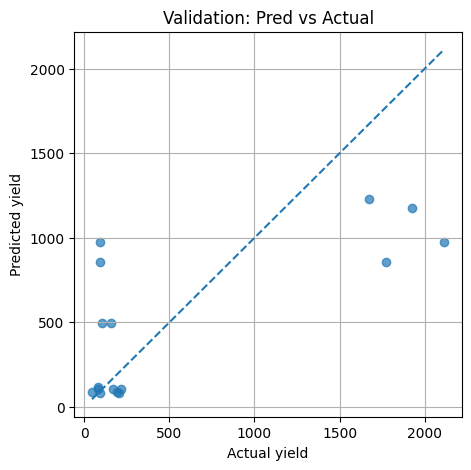

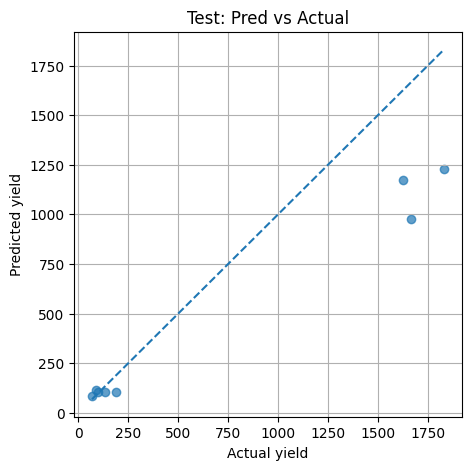

Saved outputs/*.csv and outputs_ca_demo.zip


In [9]:
def parity_plot(y_true, y_pred, title):
    plt.figure(figsize=(5,5))
    plt.scatter(y_true, y_pred, alpha=0.7)
    lo, hi = min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())
    plt.plot([lo, hi], [lo, hi], "--")
    plt.xlabel("Actual yield"); plt.ylabel("Predicted yield")
    plt.title(title); plt.grid(True); plt.show()

parity_plot(y_val,  val_pred,  "Validation: Pred vs Actual")
parity_plot(y_test, test_pred, "Test: Pred vs Actual")

df.to_csv("outputs/merged_ca_2019_2022.csv", index=False)
train_df.to_csv("outputs/train.csv", index=False)
val_df.to_csv("outputs/val.csv", index=False)
test_df.to_csv("outputs/test.csv", index=False)

import shutil
shutil.make_archive("outputs_ca_demo", "zip", "outputs")
print("Saved outputs/*.csv and outputs_ca_demo.zip")
